In [2]:
#Object Oriented programming for cosine potential
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import linalg, sparse
from scipy.sparse.linalg import eigsh
from scipy.constants import hbar

In [13]:
#Classes
class Hamiltonian:
    def __init__(self, alpha, Er, N,q):
        self.mass = 1  #mass of atom
        self.alpha = alpha #lattice depth
        self.N = N #
        self.dims = 2*N + 1 # dimension of hamiltonian matrix
        self.q = q #quasi momentum
        self.hbar_scaled = 1 #scaled planck constant
        self.k_l = 1 #scaled lattice wavenumber
        self.Er = (self.hbar_scaled**2)*(self.k_l**2)/(2*self.mass) #recoil energy

    def potential(self):
         
        return self.alpha*self.Er
    

    def H_builder(self):
        V_0 = self.potential()
        main_diag = np.zeros(self.dims)
        for i in range(-self.N, self.N+1):
            main_diag[i + self.N] = ((2*i + self.q) / (self.hbar_scaled * self.k_l))**2 * self.Er
        offset_diag = np.full(self.dims-1, V_0/4)
        H = np.zeros((self.dims,self.dims), dtype= float)
        np.fill_diagonal(H, main_diag)
        np.fill_diagonal(H[1:], offset_diag)
        np.fill_diagonal(H[:,1:], offset_diag)
        return H, main_diag, offset_diag
       

In [ ]:
#Setting constants as needed
Cos_Ham = Hamiltonian(alpha=5, Er=1, N=10, q=0)
q_vals = np.linspace(-Cos_Ham.hbar_scaled*Cos_Ham.k_l, Cos_Ham.hbar_scaled*Cos_Ham.k_l, 200)
energy_bands = np.zeros((len(q_vals), Cos_Ham.dims))

#Building Hamiltonian and calculating energy bands
for i, q in enumerate(q_vals):
    Cos_Ham.q = q
    H, main_diag, offset_diag = Cos_Ham.H_builder()
    eigenvalues = sp.linalg.eigh_tridiagonal(main_diag, offset_diag)[0]
    energy_bands[i, :] = eigenvalues  

#Getting and plotting results
print(energy_bands)


<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
C:\Users\sanvi\AppData\Local\Temp\ipykernel_34128\3654170687.py:7: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('q Value ($\hbar k$)')


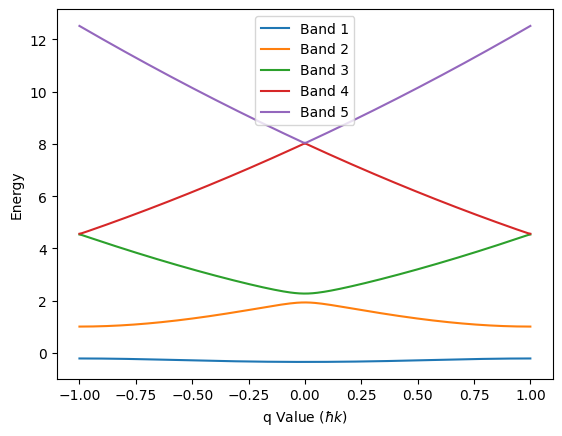

In [26]:
#Plotting the energy bands
lines = []
for band in range(5):
    line, = plt.plot(q_vals, energy_bands[:, band], label=f'Band {band + 1}')
    lines.append(line)

plt.xlabel('q Value ($\hbar k$)')
plt.ylabel('Energy')

# Create a custom legend showing band labels with their respective colors
plt.legend(handles=lines, labels=[f'Band {i+1}' for i, line in enumerate(lines)])

plt.show()
